<a href="https://colab.research.google.com/github/BoKna031/ImageInpainting/blob/master/ImageInpaintingCIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Show of some pictures

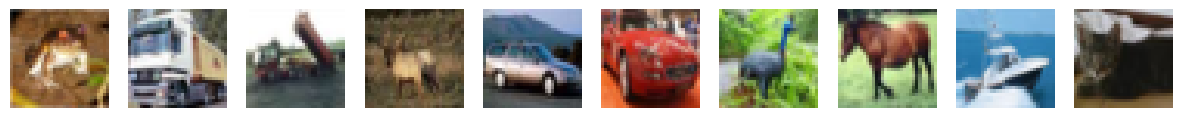

In [4]:
import matplotlib.pyplot as plt

# Prikaz prvih 10 slika iz trening skupa
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(train_images[i])
    axes[i].axis('off')
plt.show()

# Preparation of datasets

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def non_blind_image(image):
  modified_image = np.copy(image)
  center_x = image.shape[0] // 2
  center_y = image.shape[1] // 2
  modified_image[center_x-5:center_x+5, center_y-5:center_y+5, :] = 0

  return modified_image

def crop_center(image):
  center_x = image.shape[0] // 2
  center_y = image.shape[1] // 2
  center_img = image[center_x-5:center_x+5, center_y-5:center_y+5, :]
  return np.copy(center_img)

**Euclidean dataset**

In [6]:
train_eucl_in = []
train_eucl_out = []

for img in train_images:
  train_eucl_in.append(non_blind_image(img))
  train_eucl_out.append(crop_center(img))

In [7]:
test_eucl_in = []
test_eucl_out = []

for img in test_images:
  test_eucl_in.append(non_blind_image(img))
  test_eucl_out.append(crop_center(img))

Scailing datasets to be in range of [0,1] from [0,255]

In [8]:
train_eucl_in = np.asarray(train_eucl_in, dtype='float32') / 255.0
train_eucl_out = np.asarray(train_eucl_out, dtype='float32') / 255.0
test_eucl_in = np.asarray(test_eucl_in, dtype='float32') / 255.0
test_eucl_out = np.asarray(test_eucl_out, dtype='float32') / 255.0

train_eucl_out = np.reshape(train_eucl_out, (train_eucl_out.shape[0], 300))
test_eucl_out = np.reshape(test_eucl_out, (test_eucl_out.shape[0], 300))

# **Softmax dataset**

Quantized the color space into 8 bins in each channel, thus giving a total of 512 labels

**Currently excluded from project => TODO**

In [12]:
'''
import numpy as np

#checking range of values for RGB filters
np.max(train_images)
'''

'\nimport numpy as np\n\n#checking range of values for RGB filters\nnp.max(train_images)\n'

In [13]:
'''
def quantize_color_space(img, num_bins):
    bin_boundaries = np.linspace(0, 255, num_bins)
    quantized_image = np.digitize(img, bin_boundaries)

    return quantized_image
'''

'\ndef quantize_color_space(img, num_bins):\n    bin_boundaries = np.linspace(0, 255, num_bins)\n    quantized_image = np.digitize(img, bin_boundaries)\n    \n    return quantized_image\n'

In [14]:
'''
test_softmax_in = []
test_softmax_out = []
num_of_bins = 8
for img in test_images:
  quantizied_img = quantize_color_space(img, num_of_bins)
  test_softmax_in.append(non_blind_image(quantizied_img))
  test_softmax_out.append(crop_center(quantizied_img))
'''

'\ntest_softmax_in = []\ntest_softmax_out = []\nnum_of_bins = 8\nfor img in test_images:\n  quantizied_img = quantize_color_space(img, num_of_bins)\n  test_softmax_in.append(non_blind_image(quantizied_img))\n  test_softmax_out.append(crop_center(quantizied_img))\n'

In [15]:
'''
train_softmax_in = []
train_softmax_out = []
num_of_bins = 8
for img in train_images:
  quantizied_img = quantize_color_space(img, num_of_bins)
  train_softmax_in.append(non_blind_image(quantizied_img))
  train_softmax_out.append(crop_center(quantizied_img))
'''

'\ntrain_softmax_in = []\ntrain_softmax_out = []\nnum_of_bins = 8\nfor img in train_images:\n  quantizied_img = quantize_color_space(img, num_of_bins)\n  train_softmax_in.append(non_blind_image(quantizied_img))\n  train_softmax_out.append(crop_center(quantizied_img))\n'

In [16]:
'''
def dequantization(img):
   return (img.copy() * (255//num_of_bins))
'''

'\ndef dequantization(img):\n   return (img.copy() * (255//num_of_bins))\n'

In [17]:
'''
num_of_images = 7
fig, axes = plt.subplots(2, num_of_images, figsize=(15, 6))
for i, img in enumerate(test_images[:num_of_images]):
  axes[0][i].imshow(img)
  quantizied_img = quantize_color_space(img, num_of_bins)
  axes[1][i].imshow(dequantization(quantizied_img))

axes[0][0].set_ylabel("Original")
axes[1][0].set_ylabel("Quantizied")
plt.show()
'''

'\nnum_of_images = 7\nfig, axes = plt.subplots(2, num_of_images, figsize=(15, 6))\nfor i, img in enumerate(test_images[:num_of_images]):\n  axes[0][i].imshow(img)\n  quantizied_img = quantize_color_space(img, num_of_bins)\n  axes[1][i].imshow(dequantization(quantizied_img))\n\naxes[0][0].set_ylabel("Original")\naxes[1][0].set_ylabel("Quantizied")\nplt.show()\n'

# Networks

In [15]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation
from tensorflow.keras.models import Sequential

**Non-Blind Softmax**

In [ ]:
softmax_model = Sequential()

#5 layers with 64 filters of 3x3 kernel
softmax_model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
softmax_model.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
softmax_model.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
softmax_model.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
softmax_model.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))

#1 layer with 3 filters of 3x3 kernel
softmax_model.add(Conv2D(3, kernel_size=3, padding='same', strides=2, activation='relu'))

#FC layer
softmax_model.add(Flatten())
softmax_model.add(Dense(512, activation='softmax'))

#softmax_model.add(Conv2D(100, kernel_size=3, padding='same', strides=2, activation='relu'))

#model_softmax.add(Dense(10*10*3))
#model_softmax.add(Activation('softmax'))

softmax_model.summary()

softmax_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Non-Blind Euclidean without Sigmoid**

In [10]:
euclidean_model_1 = Sequential()

euclidean_model_1.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
for i in range(9):
  if (i + 1) % 3 == 0:
     euclidean_model_1.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
  else:
    euclidean_model_1.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

euclidean_model_1.add(Flatten())
euclidean_model_1.add(Dense(300, activation='relu'))
euclidean_model_1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [18]:
euclidean_model_2 = Sequential()

#3 layers with 16 filters 3x3 kernel
euclidean_model_2.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
euclidean_model_2.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
euclidean_model_2.add(Conv2D(16, kernel_size=3, padding='same', strides = 2, activation='relu')) #third layer have stride 2

#3 layers with 32 filters 3x3 kernel
euclidean_model_2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
euclidean_model_2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
euclidean_model_2.add(Conv2D(32, kernel_size=3, padding='same', strides = 2, activation='relu')) #third layer have stride

#4 layers with 64 filters 3x3 kernel
euclidean_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
euclidean_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
euclidean_model_2.add(Conv2D(64, kernel_size=3, padding='same', strides = 2, activation='relu')) #third layer have stride
euclidean_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# FC layer
euclidean_model_2.add(Flatten())
euclidean_model_2.add(Dense(300, activation='relu'))
euclidean_model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Ispisivanje informacija o modelu
#model.summary()

**Non-Blind Euclidean with Sigmoid**

In [16]:
sigmoid_model_1 = Sequential()

sigmoid_model_1.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
for i in range(9):
  if (i + 1) % 3 == 0:
     sigmoid_model_1.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
  else:
    sigmoid_model_1.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

sigmoid_model_1.add(Flatten())
sigmoid_model_1.add(Dense(300, activation='sigmoid'))
sigmoid_model_1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
sigmoid_model_2 = Sequential()

# Dodavanje konvolucijskih slojeva
sigmoid_model_2.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
sigmoid_model_2.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
sigmoid_model_2.add(Conv2D(16, kernel_size=3, padding='same', strides=2, activation='relu'))
sigmoid_model_2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
sigmoid_model_2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
sigmoid_model_2.add(Conv2D(32, kernel_size=3, padding='same', strides=2, activation='relu'))
sigmoid_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
sigmoid_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
sigmoid_model_2.add(Conv2D(64, kernel_size=3, padding='same', strides=2, activation='relu'))
sigmoid_model_2.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Dodavanje potpuno povezanog sloja
sigmoid_model_2.add(Flatten())
sigmoid_model_2.add(Dense(300, activation='sigmoid'))
#model_sigmoid.add(Activation('sigmoid'))
sigmoid_model_2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Ispisivanje informacija o modelu
#model_sigmoid.summary()

# Model training

In [17]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import backend as K

def lr_schedule(epoch):
  model = sigmoid_model_1 #change before model fit
  lr = K.get_value(model.optimizer.lr)
  if epoch % 2 == 0 and epoch > 0:
      K.set_value(model.optimizer.lr, lr * 0.8)
      print(f"Learning rate reduced to: {lr * 0.8}")
  return K.get_value(model.optimizer.lr)

batch_size = 64
weight_decay = 0.005
lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
eucl_64_history = euclidean_model_1.fit(train_eucl_in, train_eucl_out, batch_size=batch_size, epochs=100, callbacks=[lr_scheduler], validation_data=(test_eucl_in, test_eucl_out))

In [ ]:
eucl_16_32_64_history = euclidean_model_2.fit(train_eucl_in, train_eucl_out, batch_size=batch_size, epochs=100, callbacks=[lr_scheduler], validation_data=(test_eucl_in, test_eucl_out))

In [ ]:
sigmoid_64_history = sigmoid_model_1.fit(train_eucl_in, train_eucl_out, batch_size=batch_size, epochs=100, callbacks=[lr_scheduler], validation_data=(test_eucl_in, test_eucl_out))

In [ ]:
sigmoid_16_32_64_history = sigmoid_model_2.fit(train_eucl_in, train_eucl_out, batch_size=batch_size, epochs=100, callbacks=[lr_scheduler], validation_data=(test_eucl_in, test_eucl_out))

**Saving models and history of loss function**

In [28]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ImageInpainting/CIFAR-10/trained-models"
HISTORY_PATH = "/content/drive/MyDrive/Colab Notebooks/ImageInpainting/CIFAR-10/history"

In [ ]:
import pickle

def save_history(history, path):
  with open(path, 'wb') as f:
    pickle.dump(history, f)

In [ ]:
euclidean_model_1.save(MODEL_PATH + "/euclidean_model_1.h5")
save_history(eucl_64_history.history, HISTORY_PATH + "/euclidean_model_64_history.pkl")

In [ ]:
euclidean_model_2.save(MODEL_PATH + "/euclidean_model_2.h5")
save_history(eucl_16_32_64_history.history, HISTORY_PATH + "/euclidean_model_2_history.pkl")

In [ ]:
sigmoid_model_1.save(MODEL_PATH + "/sigmoid_model_64.h5")
save_history(sigmoid_64_history, HISTORY_PATH + "/sigmoid_model_64_history.pkl")

In [ ]:
sigmoid_model_2.save(MODEL_PATH + "/sigmoid_model.h5")
save_history(sigmoid_16_32_64_history + "/sigmoid_model_2_history.pkl")

# Monitoring - History of loss function


In [19]:
def load_history(path):
  with open(path, "rb") as file:
    return pickle.load(file)

In [25]:
h1 = load_history(HISTORY_PATH + "/euclidean_model_64_history.pkl")
h2 = load_history(HISTORY_PATH + "/euclidean_model_2_history.pkl")
h3 = load_history(HISTORY_PATH + "/sigmoid_model_64_history.pkl")
h4 = load_history(HISTORY_PATH + "/sigmoid_model_2_history.pkl")

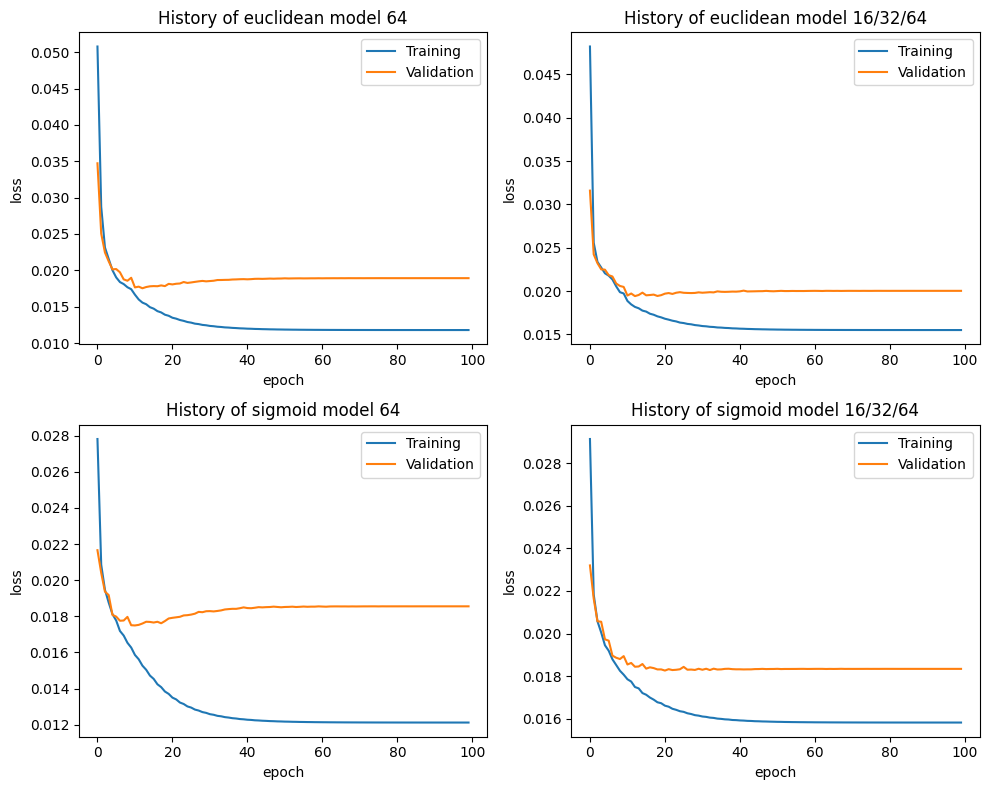

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(h1['loss'])
axes[0, 0].plot(h1['val_loss'])
axes[0, 0].set_title('History of euclidean model 64')
axes[0, 0].set_xlabel('epoch')
axes[0, 0].set_ylabel('loss')
axes[0, 0].legend(['Training', 'Validation'])

axes[0, 1].plot(h2['loss'])
axes[0, 1].plot(h2['val_loss'])
axes[0, 1].set_title('History of euclidean model 16/32/64')
axes[0, 1].set_xlabel('epoch')
axes[0, 1].set_ylabel('loss')
axes[0, 1].legend(['Training', 'Validation'])

axes[1, 0].plot(h3['loss'])
axes[1, 0].plot(h3['val_loss'])
axes[1, 0].set_title('History of sigmoid model 64')
axes[1, 0].set_xlabel('epoch')
axes[1, 0].set_ylabel('loss')
axes[1, 0].legend(['Training', 'Validation'])

axes[1, 1].plot(h4['loss'])
axes[1, 1].plot(h4['val_loss'])
axes[1, 1].set_title('History of sigmoid model 16/32/64')
axes[1, 1].set_xlabel('epoch')
axes[1, 1].set_ylabel('loss')
axes[1, 1].legend(['Training', 'Validation'])

# Prikazivanje grafikona
plt.tight_layout()
plt.show()


# Predictions

In [29]:
from keras.models import load_model

euc1_model = load_model(MODEL_PATH + "/euclidean_model_1.h5")
euc2_model = load_model(MODEL_PATH + "/euclidean_model_2.h5")
sigm1_model = load_model(MODEL_PATH + "/sigmoid_model.h5")
sigm2_model = load_model(MODEL_PATH + "/sigmoid_model_64.h5")

In [30]:
def full_image(nb_img, center):
  modified_image = np.copy(nb_img)
  center_x = nb_img.shape[0] // 2
  center_y = nb_img.shape[1] // 2
  modified_image[center_x-5:center_x+5, center_y-5:center_y+5, :] = center

  return modified_image

In [31]:
data = test_eucl_in[10:60]
output = test_eucl_out[10:60]

pred_m1 = euc1_model.predict(data)
pred_m2 = euc2_model.predict(data)
pred_m3 = sigm1_model.predict(data)
pred_m4 = sigm2_model.predict(data)


2/2 [==============================] - 0s 87ms/step


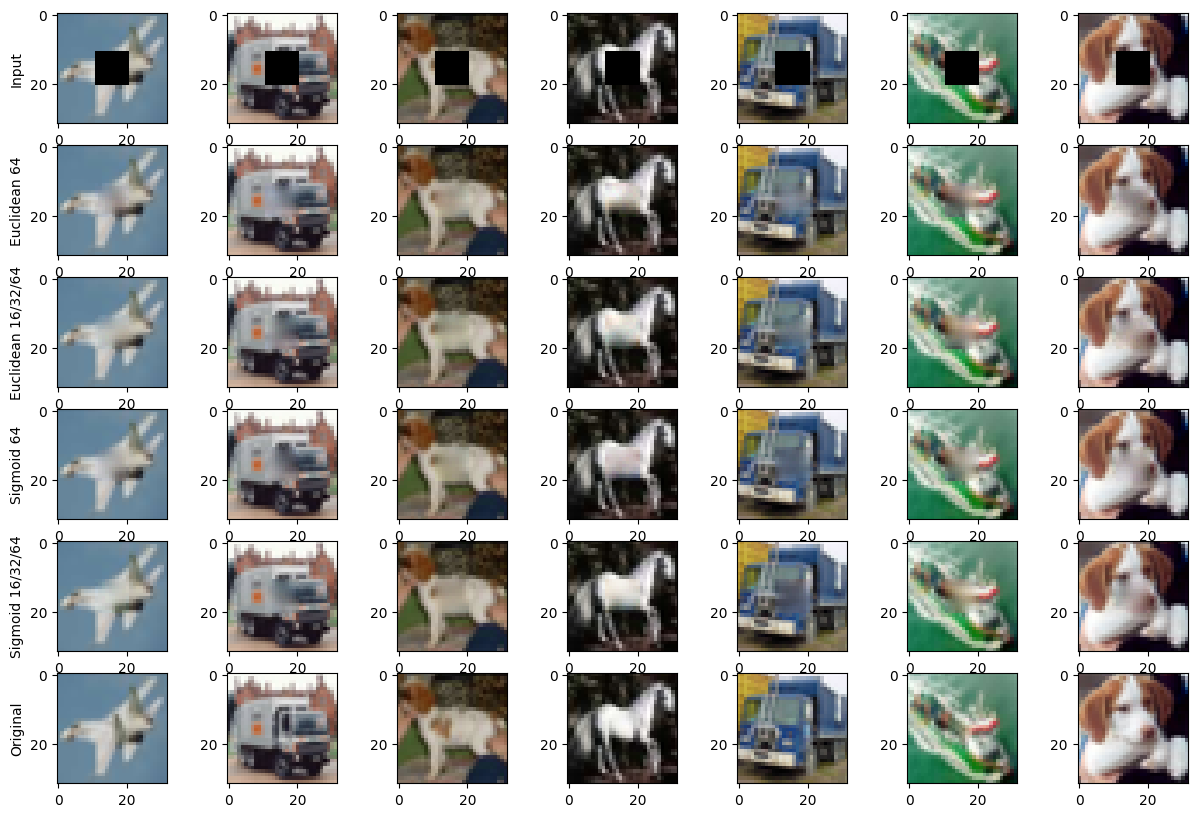

In [35]:
fig, axes = plt.subplots(6, 7, figsize=(15, 10))
for i in range(7):
    p_m1_img = np.reshape(pred_m1[i], (10, 10, 3))
    p_m2_img = np.reshape(pred_m2[i], (10, 10, 3))
    p_m3_img = np.reshape(pred_m3[i], (10, 10, 3))
    p_m4_img = np.reshape(pred_m4[i], (10, 10, 3))
    axes[0][i].imshow(data[i])
    axes[1][i].imshow(full_image(data[i],p_m1_img))
    axes[2][i].imshow(full_image(data[i],p_m2_img))
    axes[3][i].imshow(full_image(data[i],p_m3_img))
    axes[4][i].imshow(full_image(data[i],p_m4_img))

    org_image = np.reshape(output[i], (10, 10, 3))
    axes[5][i].imshow(full_image(data[i],org_image))

axes[0][0].set_ylabel("Input")
axes[1][0].set_ylabel("Euclidean 64")
axes[2][0].set_ylabel("Euclidean 16/32/64")
axes[3][0].set_ylabel("Sigmoid 64")
axes[4][0].set_ylabel("Sigmoid 16/32/64")
axes[5][0].set_ylabel("Original")
plt.show()